In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd 
import datetime 


In [2]:
ground_truth_poses = pd.read_csv('../KITTY_DATASET/ground_truth_poses/00.txt', delimiter=' ', header=None)
print("poses shape ", ground_truth_poses.shape)
ground_truth_poses.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '../KITTY_DATASET/ground_truth_poses/00.txt'

there are 4541 image frames and there are 12 columns from flattening a 3x4 transformation matrix

In [ ]:
np.array(ground_truth_poses.iloc[0]).reshape((3,4)).round(2) # get pose 0 
origin = np.array([0,0,0,1])

In [ ]:
gt_poses = np.zeros((len(ground_truth_poses),3,4))
trajectory = []
for npose in range(len(ground_truth_poses)): 
    gt_poses[npose] = (np.array(ground_truth_poses.iloc[npose]).reshape((3,4)))
    #trajectory[npose] = gt_poses[npose].dot(origin)

print(gt_poses.shape)

(4541, 3, 4)


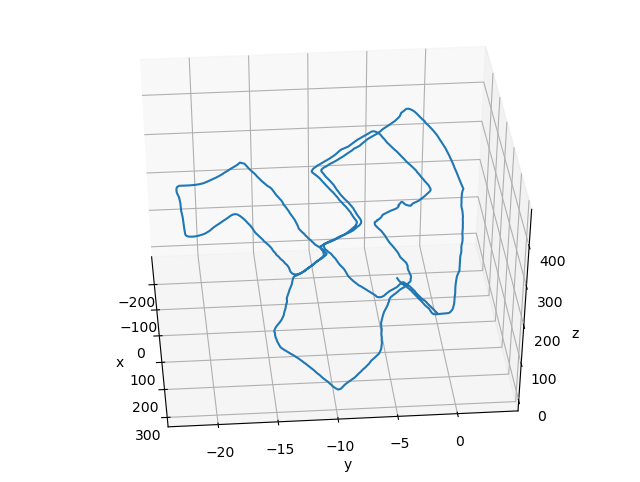

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(8,6)).add_subplot(111, projection='3d')
ax.plot(gt_poses[:,:,3][:,0], gt_poses[:,:,3][:,1], gt_poses[:,:,3][:,2])
ax.set_xlabel("x")
ax.set_zlabel("z")
ax.set_ylabel("y")
ax.view_init(elev=40., azim=-5)


(376, 1241, 3)


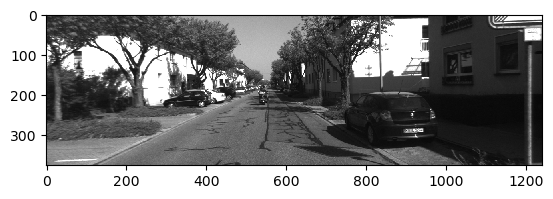

In [ ]:
test_img = cv.imread('../KITTY_DATASET/sequences/00/image_0/000000.png') #image_0 is left camera and image_1 is right camera
print(test_img.shape)

%matplotlib inline 
plt.figure()
plt.imshow(test_img)

In [ ]:
left_camera_imgs = os.listdir('../KITTY_DATASET/sequences/00/image_0')
times = pd.read_csv('../KITTY_DATASET/sequences/00/times.txt', header=None)
print(len(left_camera_imgs))
times.head()

4541


,0
0,0.000000
1,0.103736
2,0.207338
3,0.311075
4,0.414692


In [ ]:
calib = pd.read_csv('../KITTY_DATASET/sequences/00/calib.txt', delimiter=' ',header=None, index_col=0)
calib.head(10) # projection matricies  

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,718.856000,0.000000,607.192800,0.000000,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P1:,718.856000,0.000000,607.192800,-386.144800,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P2:,718.856000,0.000000,607.192800,45.382250,0.000000,718.856000,185.215700,-0.113089,0.000000,0.000000,1.000000,0.003780
P3:,718.856000,0.000000,607.192800,-337.287700,0.000000,718.856000,185.215700,2.369057,0.000000,0.000000,1.000000,0.004915
Tr:,0.000428,-0.999967,-0.008084,-0.011985,-0.007211,0.008081,-0.999941,-0.054040,0.999974,0.000486,-0.007207,-0.292197
